# 1. 데이터 불러오기

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

titanic = sns.load_dataset('titanic') 

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1-1. 데이터 구성 확인

In [56]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [57]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
titanic.describe(include =['O'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


# 2. 전처리 (컬럼 정리)

* sex 와 who 데이터는 중복된 데이터 -> 삭제
* adult_male는 age로 구분이 가능 -> 삭제
* deck는 75%이상의 데이터가 누락 -> 삭제
* alive는 survived와 중복 -> 삭제
* embarked는 embark_town과 중복 -> 삭제

In [ ]:
titanic = titanic.drop(['who','adult_male','deck','alive','embarked'], axis = 1)
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   embark_town  889 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.7+ KB


In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Third,Southampton,False
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,Third,Southampton,True
3,1,1,female,35.0,1,0,53.1000,First,Southampton,False
4,0,3,male,35.0,0,0,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,Southampton,True
887,1,1,female,19.0,0,0,30.0000,First,Southampton,True
888,0,3,female,NaN,1,2,23.4500,Third,Southampton,False
889,1,1,male,26.0,0,0,30.0000,First,Cherbourg,True


In [ ]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

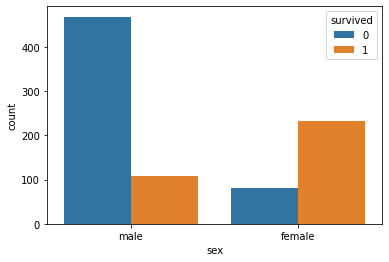

In [ ]:
# 성별에 따른 생존률
sns.countplot(data = titanic, x = 'sex', hue = 'survived')
plt.show()

In [ ]:
# age의 결측값을 처리해 주기
age_mean = titanic['age'].mean()
age_std = titanic['age'].std()
age_size = titanic['age'].isna().sum()
age_size

177

In [ ]:
np.random.seed(1)
fill_age = abs(np.random.randn(age_size) * age_std + age_mean)
print(fill_age)

[53.29516624 20.81243974 22.0266321  14.11264182 42.27045927  3.73417809
 55.04512109 18.64144763 34.33363822 26.07663955 50.93842469  0.22751087
 25.01552499 24.12015309 46.16881643 13.72155009 27.19433975 16.94690968
 30.31233553 38.16538129 13.71097611 46.32794356 42.79607284 36.99860032
 42.78539919 19.76694672 27.91395311 16.10566546 25.80764217 37.40332492
 19.65170958 23.9356786  19.71690525 17.42124015 19.94826252 29.51514538
 13.46851185 33.10435666 53.81022955 40.47842017 26.91241901 16.80497787
 18.84552469 54.28455489 30.43717636 20.44580209 32.47245093 60.20846828
 31.44460635 38.66491697 34.059541   24.58216119 13.10233009 24.62439152
 26.66461612 38.22069787 41.88660797 43.22476955 33.84770117 42.55711841
 18.74035797 47.89890356 37.15019132 25.36887287 36.7955752  28.60132536
 46.13772893 51.77673258 61.44787296  9.41291735  8.7212023  22.37099563
 32.02389571 42.42678314 34.28418787  0.32361708 25.25104587 41.72668908
 33.04158821 40.76847103 26.46946848 26.78280609 32

In [ ]:
titanic.loc[titanic['age'].isna(), 'age'] = fill_age

In [ ]:
titanic['age'].isna().sum()

0

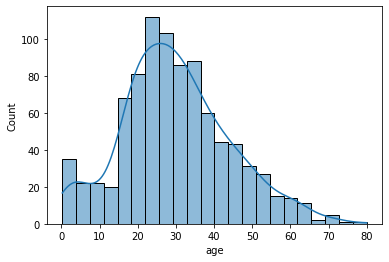

In [ ]:
sns.histplot(titanic['age'], kde = True)

plt.show()

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   embark_town  889 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.7+ KB


In [ ]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [ ]:
titanic['embark_town'].mode()

0    Southampton
dtype: object

In [ ]:
# embark_town의 누락된 값에 가장 많이 탑승한 southampton 으로 채우기
titanic.loc[titanic['embark_town'].isna(), 'embark_town'] = 'Southampton'
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   embark_town  891 non-null    object  
 9   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(4), object(2)
memory usage: 57.7+ KB


In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,3,male,22.000000,1,0,7.2500,Third,Southampton,False
1,1,1,female,38.000000,1,0,71.2833,First,Cherbourg,False
2,1,3,female,26.000000,0,0,7.9250,Third,Southampton,True
3,1,1,female,35.000000,1,0,53.1000,First,Southampton,False
4,0,3,male,35.000000,0,0,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Second,Southampton,True
887,1,1,female,19.000000,0,0,30.0000,First,Southampton,True
888,0,3,female,49.040526,1,2,23.4500,Third,Southampton,False
889,1,1,male,26.000000,0,0,30.0000,First,Cherbourg,True


In [ ]:
titanic = titanic.drop(['sibsp','parch'], axis = 1) # alone으로 충분한 데이터라고 생각
titanic

,survived,pclass,sex,age,fare,class,embark_town,alone
0,0,3,male,22.000000,7.2500,Third,Southampton,False
1,1,1,female,38.000000,71.2833,First,Cherbourg,False
2,1,3,female,26.000000,7.9250,Third,Southampton,True
3,1,1,female,35.000000,53.1000,First,Southampton,False
4,0,3,male,35.000000,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,Second,Southampton,True
887,1,1,female,19.000000,30.0000,First,Southampton,True
888,0,3,female,49.040526,23.4500,Third,Southampton,False
889,1,1,male,26.000000,30.0000,First,Cherbourg,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   embark_town  891 non-null    object  
 7   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(2)
memory usage: 43.7+ KB


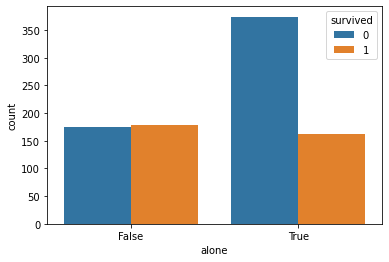

In [ ]:
sns.countplot(data = titanic, x = 'alone', hue = 'survived') # 여성의 경우 변화가 없고 남성의 경우 혼자 온 남성분들이 사망률이 높음, 하지만 관계성 이 부족하다고 생각

In [ ]:
# 필요없는 데이터라고 판단
titanic = titanic.drop('alone', axis= 1)
titanic

,survived,pclass,sex,age,fare,class,embark_town
0,0,3,male,22.000000,7.2500,Third,Southampton
1,1,1,female,38.000000,71.2833,First,Cherbourg
2,1,3,female,26.000000,7.9250,Third,Southampton
3,1,1,female,35.000000,53.1000,First,Southampton
4,0,3,male,35.000000,8.0500,Third,Southampton
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,Second,Southampton
887,1,1,female,19.000000,30.0000,First,Southampton
888,0,3,female,49.040526,23.4500,Third,Southampton
889,1,1,male,26.000000,30.0000,First,Cherbourg


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   embark_town  891 non-null    object  
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 42.9+ KB


In [ ]:
# sex데이터를 숫자로 인코딩
titanic['sex'] = titanic['sex'].map({'male' : 0, 'female' : 1})
titanic

,survived,pclass,sex,age,fare,class,embark_town
0,0,3,0,22.000000,7.2500,Third,Southampton
1,1,1,1,38.000000,71.2833,First,Cherbourg
2,1,3,1,26.000000,7.9250,Third,Southampton
3,1,1,1,35.000000,53.1000,First,Southampton
4,0,3,0,35.000000,8.0500,Third,Southampton
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,13.0000,Second,Southampton
887,1,1,1,19.000000,30.0000,First,Southampton
888,0,3,1,49.040526,23.4500,Third,Southampton
889,1,1,0,26.000000,30.0000,First,Cherbourg


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   embark_town  891 non-null    object  
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 42.9+ KB


In [ ]:
# age데이터를 int형으로 변환
titanic['age'] = titanic['age'].astype(int)
titanic['age']
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   embark_town  891 non-null    object  
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 42.9+ KB


In [ ]:
# fare는 pclass와 embark_town 에 따른 가격이 측정이 되는데 두개다 컬럼이 있어서 무의미하다고 판단
# class 는 pclass와 같으므로 삭제
titanic = titanic.drop(['fare','class'], axis = 1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   survived     891 non-null    int64 
 1   pclass       891 non-null    int64 
 2   sex          891 non-null    int64 
 3   age          891 non-null    int64 
 4   embark_town  891 non-null    object
dtypes: int64(4), object(1)
memory usage: 34.9+ KB


In [ ]:
age_max = titanic['age'].max()
age_min = titanic['age'].min()

print('최고령자 : ' , age_max , '최저연령자 : ' , age_min)

최고령자 :  80 최저연령자 :  0


In [ ]:
titanic.loc[titanic['age'] == 0, 'age'].count()

9

In [ ]:
titanic = titanic[titanic['age'] != 0]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   survived     882 non-null    int64 
 1   pclass       882 non-null    int64 
 2   sex          882 non-null    int64 
 3   age          882 non-null    int64 
 4   embark_town  882 non-null    object
dtypes: int64(4), object(1)
memory usage: 41.3+ KB


In [ ]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()
le.fit(titanic['embark_town'])
titanic['embark_town'] = le.transform(titanic['embark_town'])
print(titanic['embark_town'].unique())
titanic.head(10)

[2 0 1]


,survived,pclass,sex,age,embark_town
0,0,3,0,22,2
1,1,1,1,38,0
2,1,3,1,26,2
3,1,1,1,35,2
4,0,3,0,35,2
5,0,3,0,53,1
6,0,1,0,54,2
7,0,3,0,2,2
8,1,3,1,27,2
9,1,2,1,14,0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   survived     882 non-null    int64
 1   pclass       882 non-null    int64
 2   sex          882 non-null    int64
 3   age          882 non-null    int64
 4   embark_town  882 non-null    int64
dtypes: int64(5)
memory usage: 41.3 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = titanic.drop('survived', axis = 1)
y = titanic['survived']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 123)

titanic_model = LogisticRegression(max_iter = 1000)
titanic_model.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = titanic_model.predict(xTest)


In [ ]:
y_pred = yTest

In [ ]:
(y_pred == yTest).mean()

1.0

In [ ]:
titanic_model.predict(xTest)

In [ ]:
titanic_model.predict_proba(xTest)

In [ ]:
def predict_survival_prob(model, x):
  print('---'*5 + 'printing survival probablity')
  print('By Logistic Regression probablity of survival ', np.round(model.predict_proba(x)[:,1]*100,2))
  print('---'*5)

In [ ]:
test_input = [[1,
               0,
               12,
               2]]

predict_survival_prob(titanic_model, test_input)

---------------printing survival probablity
By Logistic Regression probablity of survival  [52.06]
---------------
